# Elastic Net Regression

This function shows how to use TensorFlow to solve elastic net regression. 
$y = Ax + b$

We will use the iris data, specifically:
```
#  y = Sepal Length
#  x = Pedal Length, Petal Width, Sepal Width
```

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [1]:
ops.reset_default_graph()

# Create graph
sess = tf.Session()

# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[3,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare the elastic net loss function
elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1)%250==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #250 A = [[ 1.05425513]
 [ 0.67239535]
 [ 0.07859089]] b = [[-0.21802382]]
Loss = [ 1.39120412]
Step #500 A = [[ 1.09866893]
 [ 0.64286464]
 [ 0.00169109]] b = [[-0.112653]]
Loss = [ 1.37810373]
Step #750 A = [[  1.09186625e+00]
 [  6.23557448e-01]
 [  2.40048699e-04]] b = [[-0.02136261]]
Loss = [ 1.28225517]
Step #1000 A = [[  1.07732940e+00]
 [  6.17205203e-01]
 [  4.08760912e-04]] b = [[ 0.06764864]]
Loss = [ 1.24415994]


In [2]:
# Get the optimal coefficients
[[sw_coef], [pl_coef], [pw_ceof]] = sess.run(A)
[y_intercept] = sess.run(b)

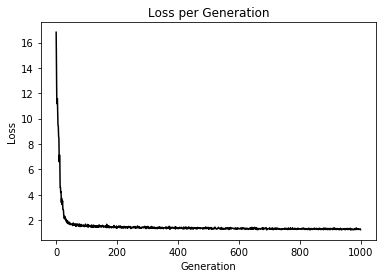

In [3]:
# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()